# Import library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera

# Input Data

In [2]:
#Input data
df = pd.read_excel("kurs-icbp.xlsx")
#Mengatur kolom tanggal sebagai indeks
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

#Tampilkan data
print(df)

               Kurs   ICBP
Tanggal                   
2020-01-02  13687.5  11150
2020-01-03  13707.5  11250
2020-01-06  13765.0  11500
2020-01-07  13870.0  11500
2020-01-08  13882.5  11550
...             ...    ...
2024-09-24  15180.0  12425
2024-09-25  15095.0  12450
2024-09-26  15160.0  12775
2024-09-27  15120.0  12650
2024-09-30  15135.0  12325

[1149 rows x 2 columns]


# Visualisasi Data

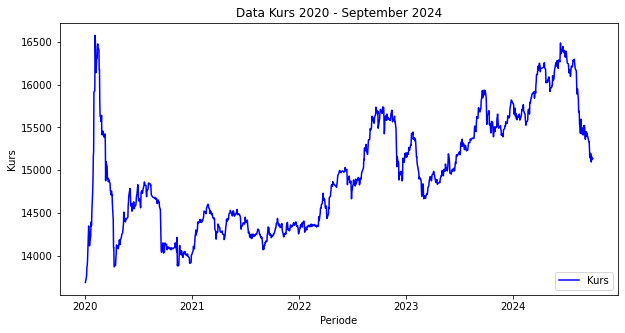

In [3]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)
plt.plot(df['Kurs'], label='Kurs', color='blue')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('Kurs')

#Menambahkan Judul
plt.title('Data Kurs 2020 - September 2024')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

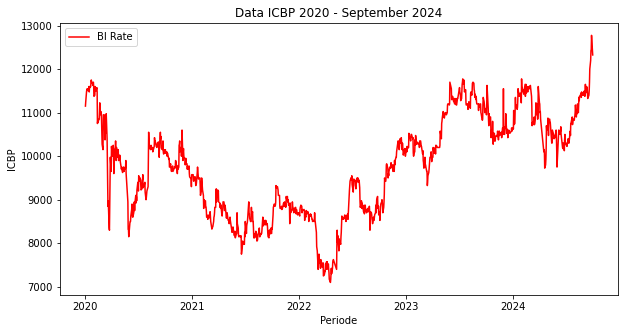

In [4]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)
plt.plot(df['ICBP'], label='BI Rate', color='red')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('ICBP')

#Menambahkan Judul
plt.title('Data ICBP 2020 - September 2024')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

# Uji Korelasi

In [5]:
#Uji korelasi
#Calculate the correlation coefficient
corr_coef = df['Kurs'].corr(df['ICBP'])

#Print the correlation coefficient
print("Correlation coefficient:", corr_coef)

Correlation coefficient: 0.5368945033248789


In [6]:
#Hitung koefisien korelasi Pearson
corr_coef, p_value = pearsonr(df['Kurs'], df['ICBP'])

#Print koefisien korelasi Pearson dan p-value
print("Correlation coefficient:", corr_coef)
print("P-value:", p_value)

#Uji signifikansi
if p_value < 0.05:  # Misalnya, tingkat signifikansi 0.05
    print("Korelasi signifikan.")
else:
    print("Korelasi tidak signifikan.")

Correlation coefficient: 0.5368945033248793
P-value: 8.893166998117764e-87
Korelasi signifikan.


# Uji Stasioneritas

In [7]:
#Uji stasioneritas
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test untuk {name}')
    print('Hasil ADF Statistic:', result[0])
    print('P-Value:', result[1])
    print('Nilai Lag Terbaik:', result[2])
    print('Jumlah Observasi:', result[3])
    print('Kriteria AIC:', result[5])
    print('Kesimpulan:')
    if result[1] <= 0.05:
        print(f"{name} adalah stasioner")
    else:
        print(f"{name} tidak stasioner")

for col in df.columns:
    adf_test(df[col], name=col)

ADF Test untuk Kurs
Hasil ADF Statistic: -2.2799875732876416
P-Value: 0.17850362856299617
Nilai Lag Terbaik: 20
Jumlah Observasi: 1128
Kriteria AIC: 12202.971778523955
Kesimpulan:
Kurs tidak stasioner
ADF Test untuk ICBP
Hasil ADF Statistic: -1.5057209363131814
P-Value: 0.5306793990234819
Nilai Lag Terbaik: 11
Jumlah Observasi: 1137
Kriteria AIC: 14769.049125469148
Kesimpulan:
ICBP tidak stasioner


# Differencing

In [8]:
#Differencing pertama
df_diff = df.diff().dropna()

#Menampilkan DataFrame hasil differencing
print(df_diff.head())

             Kurs   ICBP
Tanggal                 
2020-01-03   20.0  100.0
2020-01-06   57.5  250.0
2020-01-07  105.0    0.0
2020-01-08   12.5   50.0
2020-01-09   50.0  -25.0


# Uji Stasioneritas

In [9]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test untuk {name}')
    print('Hasil ADF Statistic:', result[0])
    print('P-Value:', result[1])
    print('Nilai Lag Terbaik:', result[2])
    print('Jumlah Observasi:', result[3])
    print('Kriteria AIC:', result[5])
    print('Kesimpulan:')
    if result[1] <= 0.05:
        print(f"{name} adalah stasioner")
    else:
        print(f"{name} tidak stasioner")

for col in df_diff.columns:
    adf_test(df_diff[col], name=col)

ADF Test untuk Kurs
Hasil ADF Statistic: -7.873807210921529
P-Value: 4.904628862422105e-12
Nilai Lag Terbaik: 19
Jumlah Observasi: 1128
Kriteria AIC: 12192.201374027474
Kesimpulan:
Kurs adalah stasioner
ADF Test untuk ICBP
Hasil ADF Statistic: -11.09561578019113
P-Value: 3.980891250781059e-20
Nilai Lag Terbaik: 10
Jumlah Observasi: 1137
Kriteria AIC: 14756.976555686124
Kesimpulan:
ICBP adalah stasioner


In [10]:
df_diff

,Kurs,ICBP
Tanggal,,
2020-01-03,20.0,100.0
2020-01-06,57.5,250.0
2020-01-07,105.0,0.0
2020-01-08,12.5,50.0
2020-01-09,50.0,-25.0
...,...,...
2024-09-24,-15.0,225.0
2024-09-25,-85.0,25.0
2024-09-26,65.0,325.0


# Uji Kausalitas Granger

In [12]:
# Uji kausalitas Granger
# Mengonfigurasi model VAR
var_model = VAR(df_diff)

# Menentukan lag optimal untuk model VAR
lag_order = var_model.select_order()

# Melatih model VAR dengan lag optimal
var_result = var_model.fit(lag_order.selected_orders['aic'])

# Melakukan uji kausalitas Granger antara tiga variabel satu per satu
max_lag = 1  # Anda dapat mengubah nilai lag yang sesuai
for target_var in ['Kurs', 'ICBP']:
    for test_var in ['Kurs', 'ICBP']:
        if target_var != test_var:
            print(f'Uji kausalitas Granger antara {target_var} dan {test_var}:')
            result = grangercausalitytests(df[[target_var, test_var]], max_lag, verbose=True)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Uji kausalitas Granger antara Kurs dan ICBP:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7694  , p=0.0964  , df_denom=1145, df_num=1
ssr based chi2 test:   chi2=2.7766  , p=0.0956  , df=1
likelihood ratio test: chi2=2.7733  , p=0.0959  , df=1
parameter F test:         F=2.7694  , p=0.0964  , df_denom=1145, df_num=1
Uji kausalitas Granger antara ICBP dan Kurs:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1130  , p=0.0428  , df_denom=1145, df_num=1
ssr based chi2 test:   chi2=4.1238  , p=0.0423  , df=1
likelihood ratio test: chi2=4.1164  , p=0.0425  , df=1
parameter F test:         F=4.1130  , p=0.0428  , df_denom=1145, df_num=1


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [13]:
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


,Kurs_x,ICBP_x
Kurs_y,1.0000,0.0355
ICBP_y,0.0343,1.0000


# Uji Kointegrasi

In [14]:
#Uji Kointegrasi
coint_result = coint_johansen(df, det_order=0, k_ar_diff=1)
print('Tes Kointegrasi Johansen:')
print('Trace Statistic:', coint_result.lr1)
print('P-Value Trace Statistic:', coint_result.cvt[0, 2])
print('Max Eigenvalue Statistic:', coint_result.lr2)
print('P-Value Max Eigenvalue Statistic:', coint_result.cvm[0, 2])

# Jika ada kointegrasi, hitung vektor kointegrasi
if coint_result.lr1[0] > coint_result.cvt[0, 2]:
    print('Ada kointegrasi, dapatkan vektor kointegrasi:')
    alpha = coint_result.evec[:, 0]
    print('Vektor Kointegrasi:', alpha)
else:
    print('Tidak ada kointegrasi.')

Tes Kointegrasi Johansen:
Trace Statistic: [15.92034888  1.7601282 ]
P-Value Trace Statistic: 19.9349
Max Eigenvalue Statistic: [14.16022068  1.7601282 ]
P-Value Max Eigenvalue Statistic: 18.52
Tidak ada kointegrasi.


In [15]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
rank1 = select_coint_rank(df, det_order=0, k_ar_diff=1, method='trace', signif=0.05)
print(rank1.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          15.92          15.49
  1   2          1.760          3.841
-------------------------------------


# Penentuan Lag Optimum

In [16]:
#Split the data into training and testing sets (90% & 10%)
train_size = int(len(df_diff) * 0.9)
train_data, test_data = df_diff[:train_size], df_diff[train_size:]

In [17]:
train_size_asli = int(len(df)*0.9)
train_data_asli,test_data_asli = df[:train_size_asli], df[train_size_asli:]

In [18]:
train_data_asli

,Kurs,ICBP
Tanggal,,
2020-01-02,13687.5,11150
2020-01-03,13707.5,11250
2020-01-06,13765.0,11500
2020-01-07,13870.0,11500
2020-01-08,13882.5,11550
...,...,...
2024-03-26,16170.0,10850
2024-03-27,16215.0,11000
2024-03-28,16170.0,11600


In [19]:
test_data_asli

,Kurs,ICBP
Tanggal,,
2024-04-03,16215.0,11000
2024-04-04,16150.0,11025
2024-04-05,16185.0,10850
2024-04-16,16205.0,10100
2024-04-17,16250.0,10150
...,...,...
2024-09-24,15180.0,12425
2024-09-25,15095.0,12450
2024-09-26,15160.0,12775


In [20]:
# Penentuan lag terbaik
model = VAR(train_data)
lag_order = model.select_order()
print('Lag Order Terbaik:', lag_order.summary())

Lag Order Terbaik:  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        18.46       18.47   1.041e+08       18.46
1        18.44      18.47*   1.020e+08       18.45
2        18.42       18.47   1.004e+08      18.44*
3        18.42       18.49   1.001e+08       18.45
4        18.41       18.50   9.928e+07       18.45
5        18.42       18.52   9.964e+07       18.46
6        18.42       18.55   1.003e+08       18.47
7        18.42       18.57   1.002e+08       18.48
8        18.42       18.58   9.959e+07       18.48
9        18.42       18.60   9.946e+07       18.49
10       18.42       18.62   9.981e+07       18.50
11       18.42       18.64   9.975e+07       18.50
12       18.41       18.65   9.868e+07       18.50
13       18.41       18.67   9.873e+07       18.51
14       18.41       18.69   9.891e+07       18.52
15       18.42       18.72   9.945e+07       18.53
16      18.4

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Model VAR

In [22]:
#Initiate VAR model
model = VAR(endog = train_data)
res = model.select_order(10)
res.summary()

# Mengonfigurasi model VAR dengan dua variabel
var_model = VAR(train_data[['Kurs', 'ICBP']])

# Menentukan lag optimal untuk model VAR
lag_order = var_model.select_order()

# Melatih model VAR dengan lag optimal
var_result = var_model.fit(lag_order.selected_orders['aic'])

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
#Fit to a VAR model
model_fit = model.fit(maxlags=3)
#Print a summary of the model results
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 11, Oct, 2024
Time:                     16:10:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    18.6548
Nobs:                     1030.00    HQIC:                   18.6131
Log likelihood:          -12481.7    FPE:                1.18174e+08
AIC:                      18.5877    Det(Omega_mle):     1.16584e+08
--------------------------------------------------------------------
Results for equation Kurs
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           1.753519         1.973745            0.888           0.374
L1.Kurs         0.096415         0.031139            3.096           0.002
L1.ICBP        -0.022533         0.011576           -1.946           0.052
L2.Kurs   

# Prediksi dengan Model VAR

In [24]:
prediksi = model_fit.fittedvalues
prediksi.columns = ["Prediksi Kurs", "Prediksi ICBP"]
prediksi

,Prediksi Kurs,Prediksi ICBP
Tanggal,,
2020-01-08,19.847764,-9.247592
2020-01-09,12.683281,-16.293602
2020-01-10,3.374245,-2.461895
2020-01-13,19.022514,6.338234
2020-01-14,47.740931,13.676568
...,...,...
2024-03-26,19.922654,-33.733745
2024-03-27,6.283637,46.241819
2024-03-28,10.169196,-1.284527


In [26]:
#Misalkan Anda memiliki hasil prediksi untuk tiga variabel yang berbeda
prediction_Kurs = prediksi['Prediksi Kurs']  # Hasil prediksi SBI
prediction_ICBP = prediksi['Prediksi ICBP']  # Hasil prediksi IHSG

#Mengambil data asli pada periode waktu sebelumnya
original_Kurs = train_data['Kurs'].shift(3)  # Data asli SBI pada periode sebelumnya
original_ICBP = train_data['ICBP'].shift(3)  # Data asli IHSG pada periode sebelumnya

#Mengundifferencing hasil prediksi
predict_undiff_Kurs = original_Kurs + prediction_Kurs
predict_undiff_ICBP = original_ICBP + prediction_ICBP

#Membuat DataFrame untuk hasil undifferencing
prediksi2 = pd.DataFrame({'Prediksi Kurs': predict_undiff_Kurs,
                                  'Prediksi ICBP': predict_undiff_ICBP})

#Menampilkan DataFrame hasil prediksi yang telah di-undifferencing
prediksi2

,Prediksi Kurs,Prediksi ICBP
Tanggal,,
2020-01-03,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,39.847764,90.752408
2020-01-09,70.183281,233.706398
...,...,...
2024-03-26,52.922654,-308.733745
2024-03-27,92.283637,221.241819
2024-03-28,9.869196,73.715473


In [29]:
#Misalkan Anda memiliki hasil prediksi untuk tiga variabel yang berbeda
prediction_Kurs = prediksi2['Prediksi Kurs']  # Hasil prediksi SBI
prediction_ICBP = prediksi2['Prediksi ICBP']  # Hasil prediksi IHSG

#Mengambil data asli pada periode waktu sebelumnya
original_Kurs = train_data_asli['Kurs'].shift(1)  # Data asli SBI pada periode sebelumnya
original_ICBP = train_data_asli['ICBP'].shift(1)  # Data asli IHSG pada periode sebelumnya

#Mengundifferencing hasil prediksi
predict_undiff_Kurs = original_Kurs + prediction_Kurs
predict_undiff_ICBP = original_ICBP + prediction_ICBP

#Membuat DataFrame untuk hasil undifferencing
predict_undiff_df = pd.DataFrame({'Prediksi Kurs': predict_undiff_Kurs,
                                  'Prediksi ICBP': predict_undiff_ICBP})

#Menghapus baris pertama yang tidak memiliki nilai yang valid setelah differencing
predict_undiff_df = predict_undiff_df.iloc[4:]

#Menampilkan DataFrame hasil prediksi yang telah di-undifferencing
predict_undiff_df

,Prediksi Kurs,Prediksi ICBP
Tanggal,,
2020-01-08,13909.847764,11590.752408
2020-01-09,13952.683281,11783.706398
2020-01-10,14040.874245,11522.538105
2020-01-13,14066.522514,11581.338234
2020-01-14,14445.240931,11538.676568
...,...,...
2024-03-26,16169.622654,10891.266255
2024-03-27,16262.283637,11071.241819
2024-03-28,16224.869196,11073.715473


In [30]:
#RUN TERAKHIR
df_prediksi = pd.DataFrame(predict_undiff_df)

# Menyimpan DataFrame sebagai file Excel
nama_file_excel = 'dataprediksi_sama.xlsx'  # Nama file Excel yang ingin Anda berikan
df_prediksi.to_excel(nama_file_excel, index=False)  # index=False untuk menghapus kolom indeks saat menyimpan

print(f'DataFrame telah disimpan sebagai file Excel dengan nama: {nama_file_excel}')

DataFrame telah disimpan sebagai file Excel dengan nama: dataprediksi_sama.xlsx


## Visualisasi Prediksi & Data Aktual (Data Train)

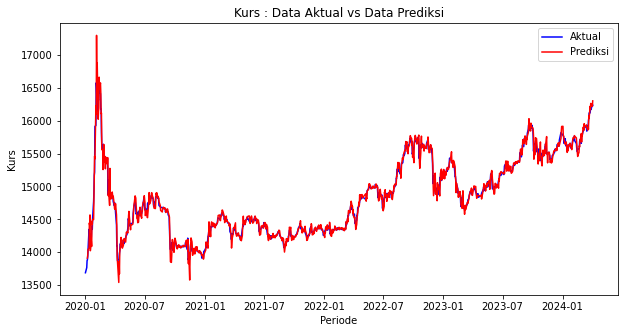

In [31]:
#Pilih kolom SBI dari DataFrame df
col = df.columns[0]

plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

#Plot data aktual dengan garis biru
plt.plot(train_data_asli['Kurs'], label='Aktual', color='blue')

#Plot data prediksi dengan garis merah
plt.plot(predict_undiff_df['Prediksi Kurs'], label='Prediksi', color='red')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('Kurs')

#Menambahkan Judul
plt.title('Kurs : Data Aktual vs Data Prediksi')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

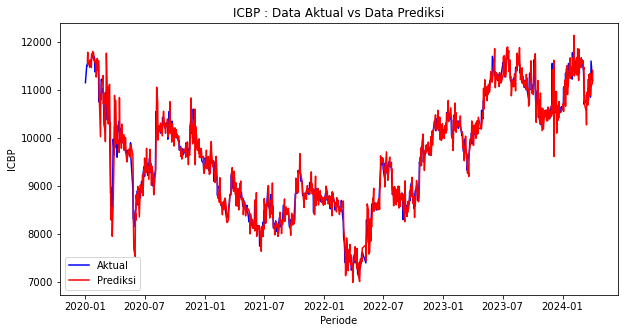

In [32]:
#Pilih kolom IHSG dari DataFrame df
col = df.columns[0]

plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

#Plot data aktual dengan garis biru
plt.plot(train_data_asli['ICBP'], label='Aktual', color='blue')

#Plot data prediksi dengan garis merah
plt.plot(predict_undiff_df['Prediksi ICBP'], label='Prediksi', color='red')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('ICBP')

#Menambahkan Judul
plt.title('ICBP : Data Aktual vs Data Prediksi')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

## Prediksi data testing

In [33]:
df_diff_test = test_data.diff().dropna()

#Menampilkan DataFrame hasil differencing
df_diff_test.shape

(114, 2)

In [34]:
lag_order = model_fit.k_ar
prediksi_test = model_fit.forecast(df_diff.values[-lag_order:], len(df_diff_test))
prediksi_test = pd.DataFrame(prediksi_test, index=df_diff_test.index, columns=df_diff_test.columns)
prediksi_test.columns = ["Prediksi Kurs", "Prediksi ICBP"]
prediksi_test

,Prediksi Kurs,Prediksi ICBP
Tanggal,,
2024-04-04,-7.569108,56.967369
2024-04-05,6.612930,8.855213
2024-04-16,6.656983,-8.090630
2024-04-17,3.103736,1.674296
2024-04-18,2.650910,-0.578734
...,...,...
2024-09-24,2.265548,-0.252380
2024-09-25,2.265548,-0.252380
2024-09-26,2.265548,-0.252380


In [35]:
#Misalkan Anda memiliki hasil prediksi untuk tiga variabel yang berbeda
prediction_Kurs = prediksi_test['Prediksi Kurs']  # Hasil prediksi SBI
prediction_ICBP = prediksi_test['Prediksi ICBP']  # Hasil prediksi IHSG

#Mengambil data asli pada periode waktu sebelumnya
original_Kurs = test_data['Kurs'].shift(1)  # Data asli SBI pada periode sebelumnya
original_ICBP = test_data['ICBP'].shift(1)  # Data asli IHSG pada periode sebelumnya

#Mengundifferencing hasil prediksi
predict_undiff_Kurs = original_Kurs + prediction_Kurs
predict_undiff_ICBP = original_ICBP + prediction_ICBP

#Membuat DataFrame untuk hasil undifferencing
prediksi_test2 = pd.DataFrame({'Prediksi Kurs': predict_undiff_Kurs,
                                  'Prediksi ICBP': predict_undiff_ICBP})

#Menampilkan DataFrame hasil prediksi yang telah di-undifferencing
prediksi_test2

,Prediksi Kurs,Prediksi ICBP
Tanggal,,
2024-04-03,NaN,NaN
2024-04-04,-22.569108,-143.032631
2024-04-05,-58.387070,33.855213
2024-04-16,41.656983,-183.090630
2024-04-17,23.103736,-748.325704
...,...,...
2024-09-24,52.265548,199.747620
2024-09-25,-12.734452,224.747620
2024-09-26,-82.734452,24.747620


In [37]:
#Misalkan Anda memiliki hasil prediksi untuk tiga variabel yang berbeda
prediction_Kurs = prediksi_test['Prediksi Kurs']  # Hasil prediksi SBI
prediction_ICBP = prediksi_test['Prediksi ICBP']  # Hasil prediksi IHSG

#Mengambil data asli pada periode waktu sebelumnya
original_Kurs = test_data_asli['Kurs'].shift(1)  # Data asli SBI pada periode sebelumnya
original_ICBP = test_data_asli['ICBP'].shift(1)  # Data asli IHSG pada periode sebelumnya

#Mengundifferencing hasil prediksi
predict_undiff_Kurs = original_Kurs + prediction_Kurs
predict_undiff_ICBP = original_ICBP + prediction_ICBP

#Membuat DataFrame untuk hasil undifferencing
test_predict_undiff_df = pd.DataFrame({'Prediksi Kurs': predict_undiff_Kurs,
                                  'Prediksi ICBP': predict_undiff_ICBP})

#Menghapus baris pertama yang tidak memiliki nilai yang valid setelah differencing
test_predict_undiff_df = test_predict_undiff_df.iloc[1:]

#Menampilkan DataFrame hasil prediksi yang telah di-undifferencing
test_predict_undiff_df

,Prediksi Kurs,Prediksi ICBP
Tanggal,,
2024-04-04,16207.430892,11056.967369
2024-04-05,16156.612930,11033.855213
2024-04-16,16191.656983,10841.909370
2024-04-17,16208.103736,10101.674296
2024-04-18,16252.650910,10149.421266
...,...,...
2024-09-24,15197.265548,12199.747620
2024-09-25,15182.265548,12424.747620
2024-09-26,15097.265548,12449.747620


In [38]:
#RUN TERAKHIR
df_prediksi_test = pd.DataFrame(test_predict_undiff_df)

# Menyimpan DataFrame sebagai file Excel
nama_file_excel = 'dataprediksitest_sama.xlsx'  # Nama file Excel yang ingin Anda berikan
df_prediksi_test.to_excel(nama_file_excel, index=False)  # index=False untuk menghapus kolom indeks saat menyimpan

print(f'DataFrame telah disimpan sebagai file Excel dengan nama: {nama_file_excel}')

DataFrame telah disimpan sebagai file Excel dengan nama: dataprediksitest_sama.xlsx


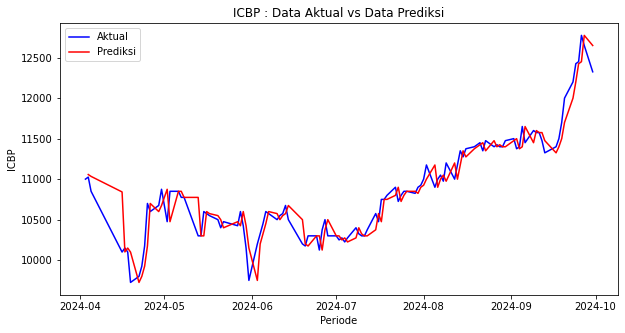

In [39]:
#Pilih kolom IHSG dari DataFrame df
col = df.columns[0]

plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

#Plot data aktual dengan garis biru
plt.plot(test_data_asli['ICBP'], label='Aktual', color='blue')

#Plot data prediksi dengan garis merah
plt.plot(test_predict_undiff_df['Prediksi ICBP'], label='Prediksi', color='red')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('ICBP')

#Menambahkan Judul
plt.title('ICBP : Data Aktual vs Data Prediksi')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

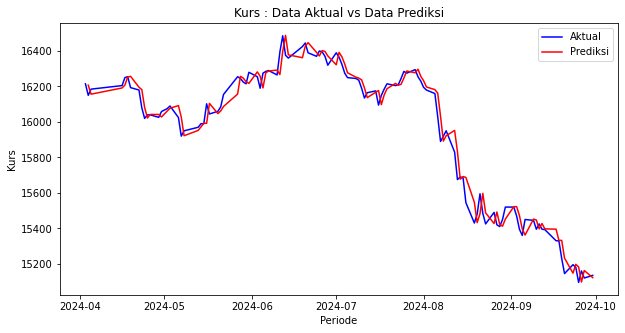

In [40]:
#Pilih kolom SBI dari DataFrame df
col = df.columns[0]

plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

#Plot data aktual dengan garis biru
plt.plot(test_data_asli['Kurs'], label='Aktual', color='blue')

#Plot data prediksi dengan garis merah
plt.plot(test_predict_undiff_df['Prediksi Kurs'], label='Prediksi', color='red')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('Kurs')

#Menambahkan Judul
plt.title('Kurs : Data Aktual vs Data Prediksi')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

<Figure size 720x360 with 0 Axes>

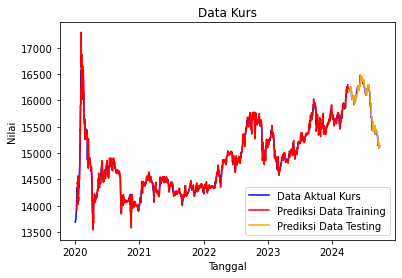

In [41]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)
# Membuat figure dan axis
fig, ax = plt.subplots()

# Memplot data pertama
plt.plot(train_data_asli['Kurs'], label='Data Aktual Kurs', color='blue')
ax.plot(predict_undiff_df.index, predict_undiff_df['Prediksi Kurs'], label='Prediksi Data Training', color='red')

# Memplot data kedua
plt.plot(test_data_asli['Kurs'], color='blue')
ax.plot(test_predict_undiff_df.index, test_predict_undiff_df['Prediksi Kurs'],label='Prediksi Data Testing', color='orange')

# Menambahkan judul dan label sumbu
ax.set_title('Data Kurs')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Nilai')

# Menambahkan legenda
ax.legend()

# Menampilkan plot
plt.show()

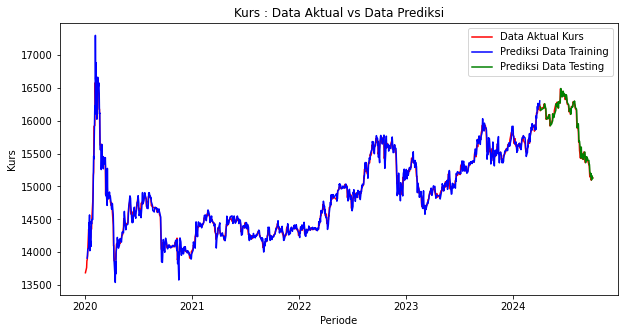

In [43]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(train_data_asli['Kurs'], label='Data Aktual Kurs', color='red')
plt.plot(predict_undiff_df.index, predict_undiff_df['Prediksi Kurs'], label='Prediksi Data Training', color='blue')

# Memplot data kedua
plt.plot(test_data_asli['Kurs'], color='red')
plt.plot(test_predict_undiff_df.index, test_predict_undiff_df['Prediksi Kurs'],label='Prediksi Data Testing', color='green')

# Menambahkan judul dan label sumbu
plt.title('Kurs : Data Aktual vs Data Prediksi')
plt.xlabel('Periode')
plt.ylabel('Kurs')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

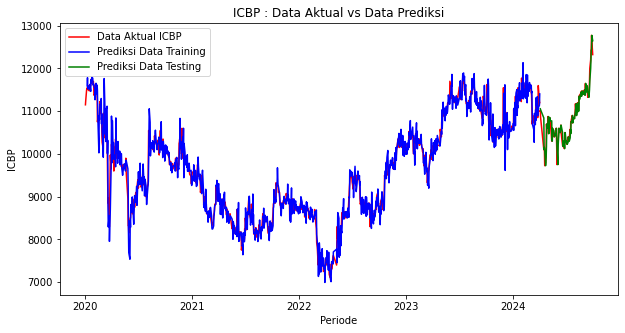

In [44]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(train_data_asli['ICBP'], label='Data Aktual ICBP', color='red')
plt.plot(predict_undiff_df.index, predict_undiff_df['Prediksi ICBP'], label='Prediksi Data Training', color='blue')

# Memplot data kedua
plt.plot(test_data_asli['ICBP'], color='red')
plt.plot(test_predict_undiff_df.index, test_predict_undiff_df['Prediksi ICBP'],label='Prediksi Data Testing', color='green')

# Menambahkan judul dan label sumbu
plt.title('ICBP : Data Aktual vs Data Prediksi')
plt.xlabel('Periode')
plt.ylabel('ICBP')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [45]:
#Menghapus baris pertama yang tidak memiliki nilai yang valid setelah differencing
test_data_asli = test_data_asli.iloc[1:]


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
#Evaluate the model
mse = mean_squared_error(test_data_asli, test_predict_undiff_df)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(test_data_asli, test_predict_undiff_df)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(test_data_asli, test_predict_undiff_df)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 18608.068518518416
Mean Absolute Percentage Error: 0.007573740355139113
Mean Absolute Error: 89.00223079252048
Accuracy: 99.99242625964486


# Peramalan dengan Model VAR

In [47]:
data_update = pd.read_excel('data_update.xlsx')

In [48]:
# Set kolom "Date" sebagai indeks
data_update.set_index('Tanggal', inplace=True)

In [49]:
#DATA ASLI
#Melakukan peramalan untuk beberapa periode ke depan
forecast_steps = 9  # Ganti dengan jumlah peiode yang Anda inginkan
forecasted_values = var_result.forecast(df.values[-model_fit.k_ar:], steps=forecast_steps)
forecast_index = data_update.index[-forecast_steps:]
#Mengonfigurasi hasil peramalan ke dalam DataFrame
forecast_actual_df = pd.DataFrame(forecasted_values, index = forecast_index, columns=['Forecast_Kurs', 'Forecast_ICBP'])

#Menampilkan hasil peramalan
print(f'Hasil Peramalan untuk {forecast_steps} Langkah ke Depan:')
print(forecast_actual_df)

ValueError: y must by have at least order (16) observations. Got 3.

In [51]:
# Extract the required number of observations (16 in this case) for forecasting
forecast_input = df.values[-model_fit.k_ar:]  # Ensure this gives you the required k_ar observations

# Confirm the shape of the input to be used for forecasting
print(forecast_input.shape)  # This should be (16, 2) to match the lag order

# Forecast for the desired number of steps
forecast_steps = 9  # Specify the number of forecast periods
forecasted_values = var_result.forecast(forecast_input, steps=forecast_steps)

# Configure the forecasted values into a DataFrame
forecast_index = pd.date_range(start=data_update.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_df = pd.DataFrame(forecasted_values, index=forecast_index, columns=df.columns)

print(forecast_df)


(3, 2)


ValueError: y must by have at least order (16) observations. Got 3.

In [43]:
#Assuming df_diff contains the differenced data
#Get the last observed values from the original data as a Series
last_observed_values = df.iloc[-1]

#Inverse difference to obtain the forecasted values in the original scale
forecasted_values_original = []
for i in range(forecast_steps):
    forecasted_step_diff = forecasted_values[i]
    forecasted_step_original = last_observed_values + forecasted_step_diff
    forecasted_values_original.append(forecasted_step_original)

forecast_index = data_update.index[-forecast_steps:]
#Create a DataFrame to store the undifferenced forecasted values
forecast_df_original = pd.DataFrame(forecasted_values_original, index = forecast_index, columns=df.columns)

#Display the undifferenced forecasted values
print(f'Undifferenced Forecasted Values for {forecast_steps} Steps Ahead:')
print(forecast_df_original)

Undifferenced Forecasted Values for 6 Steps Ahead:
             BI Rate      IHSG
Periode                       
2023-11-01  8.376372  7.168832
2023-12-01  7.097253  6.639137
2024-01-01  6.521337  6.672056
2024-02-01  6.242252  6.721846
2024-03-01  6.104542  6.750334
2024-04-01  6.036307  6.764896


In [44]:
df_peramalan = pd.DataFrame(forecast_df_original)

# Menyimpan DataFrame sebagai file Excel
nama_file_excel = 'dataperamalan_sama.xlsx'  # Nama file Excel yang ingin Anda berikan
df_peramalan.to_excel(nama_file_excel, index=False)  # index=False untuk menghapus kolom indeks saat menyimpan

print(f'DataFrame telah disimpan sebagai file Excel dengan nama: {nama_file_excel}')

DataFrame telah disimpan sebagai file Excel dengan nama: dataperamalan_sama.xlsx


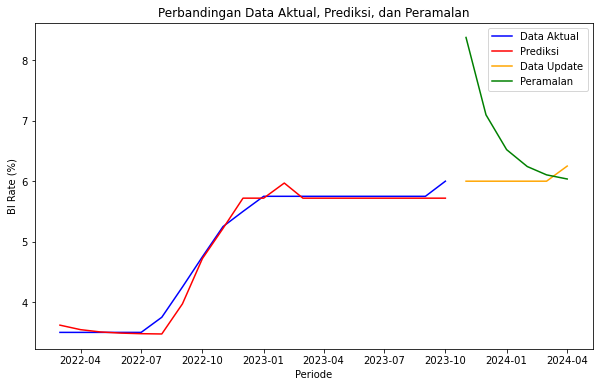

In [45]:
df_last70 = test_data_asli
predict_undiff_last70 = predict_undiff_df.iloc[-200:]

plt.figure(figsize=(10,6))

plt.plot(df_last70.index, df_last70['Kurs'], color='blue', label='Data Aktual')

plt.plot(test_predict_undiff_df['Prediksi Kurs'], label='Prediksi', color='red')

plt.plot(data_update['Kurs'], color='orange', label= 'Data Update')

plt.plot(df_peramalan.index, df_peramalan['Kurs'], color='green', label='Peramalan')

plt.xlabel('Periode')
plt.ylabel('Kurs')
plt.title('Perbandingan Data Aktual, Prediksi, dan Peramalan')

# Tambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

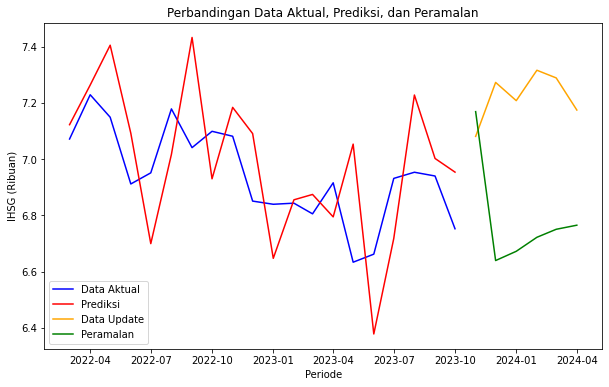

In [46]:
df_last70 = test_data_asli
predict_undiff_last70 = predict_undiff_df.iloc[-200:]

plt.figure(figsize=(10,6))

plt.plot(df_last70.index, df_last70['ICBP'], color='blue', label='Data Aktual')

plt.plot(test_predict_undiff_df['Prediksi ICBP'], label='Prediksi', color='red')

plt.plot(data_update['ICBP'], color='orange', label= 'Data Update')

plt.plot(df_peramalan.index, df_peramalan['ICBP'], color='green', label='Peramalan')

plt.xlabel('Periode')
plt.ylabel('ICBP')
plt.title('Perbandingan Data Aktual, Prediksi, dan Peramalan')

# Tambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [ ]:
import numpy as np
from scipy.stats import f

def hotellings_t2(X, Y):
    # Memastikan input adalah array numpy 2D
    X = np.asarray(X)
    Y = np.asarray(Y)
    
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    if Y.ndim == 1:
        Y = Y.reshape(-1, 1)
    
    # Ukuran sampel dan jumlah variabel
    n1, p = X.shape
    n2, _ = Y.shape
    
    # Rata-rata sampel
    X_mean = np.mean(X, axis=0)
    Y_mean = np.mean(Y, axis=0)
    
    # Kovariansi sampel
    S1 = np.cov(X, rowvar=False)
    S2 = np.cov(Y, rowvar=False)
    
 # Kovariansi gabungan (spooled)
    S_pool = ((n1 - 1) * S1 + (n2 - 1) * S2) / (n1 + n2 - 2)
    
    # Statistik T^2 Hotelling
    mean_diff = X_mean - Y_mean
    T2 = (n1 * n2) / (n1 + n2) * mean_diff.T @ np.linalg.inv(S_pool) @ mean_diff
    
    # Nilai F untuk konversi ke statistik F
    F_stat = (n1 + n2 - p - 1) * T2 / (p * (n1 + n2 - 2))
    
    # Derajat kebebasan
    df1 = p
    df2 = n1 + n2 - p - 1
    
    # Nilai p
    p_value = 1 - f.cdf(F_stat, df1, df2)
    
    return T2, F_stat, p_value

# Contoh penggunaan dengan dua variabel
# Data harga aktual (harga emas dan harga perak)

# Hitung uji T^2 Hotelling
T2, F_stat, p_value = hotellings_t2(data_update, df_peramalan)

print(f"Statistik T^2: {T2}")
print(f"Statistik F: {F_stat}")
print(f"Nilai p: {p_value}")

# Daerah kritis dan kesimpulan
alpha = 0.05
df1 = 1
df2 = len(data_update) + len(df_peramalan) - df1 - 1

# F-nilai kritis
F_critical = f.ppf(1 - alpha, df1, df2)

print(f"F-nilai kritis: {F_critical}")

# Kesimpulan
if F_stat > F_critical:
    print("Tolak H0: Ada perbedaan signifikan antara data aktual ICBP dan Kurs dengan data peramalan ICBP dan Kurs.")
else:
    print("Gagal tolak H0: Tidak ada perbedaan signifikan antara data aktual ICBP dan Kurs dengan data peramalan ICBP dan Kurs.")

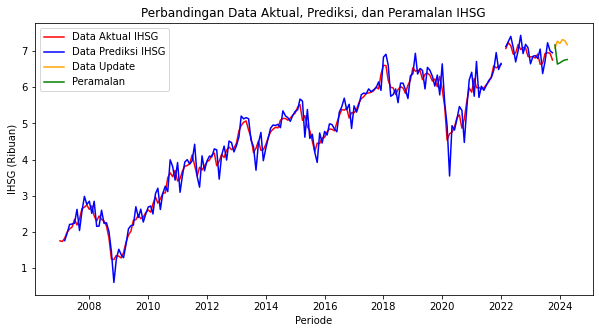

In [47]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(train_data_asli['ICBP'], label='Data Aktual ICBP', color='red')
plt.plot(predict_undiff_df.index, predict_undiff_df['Prediksi ICBP'], label='Data Prediksi ICBP', color='blue')

# Memplot data kedua
plt.plot(test_data_asli['ICBP'], color='red')
plt.plot(test_predict_undiff_df.index, test_predict_undiff_df['Prediksi ICBP'], color='blue')

plt.plot(data_update['ICBP'], color='orange', label= 'Data Update')
plt.plot(df_peramalan.index, df_peramalan['ICBP'], color='green', label='Peramalan')

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Data Aktual, Prediksi, dan Peramalan ICBP')
plt.xlabel('Periode')
plt.ylabel('ICBP')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

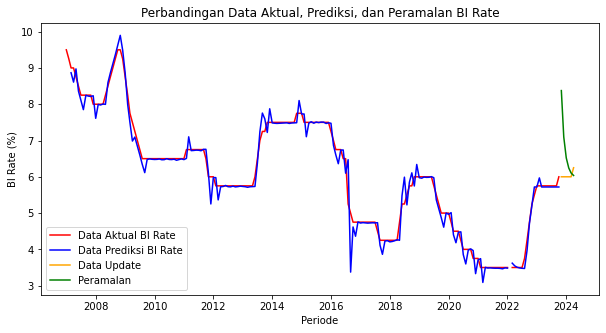

In [48]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(train_data_asli['Kurs'], label='Data Aktual Kurs', color='red')
plt.plot(predict_undiff_df.index, predict_undiff_df['Prediksi Kurs'], label='Data Prediksi Kurs', color='blue')

# Memplot data kedua
plt.plot(test_data_asli['Kurs'], color='red')
plt.plot(test_predict_undiff_df.index, test_predict_undiff_df['Prediksi Kurs'], color='blue')

plt.plot(data_update['Kurs'], color='orange', label= 'Data Update')
plt.plot(df_peramalan.index, df_peramalan['Kurs'], color='green', label='Peramalan')

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Data Aktual, Prediksi, dan Peramalan Kurs')
plt.xlabel('Periode')
plt.ylabel('Kurs')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

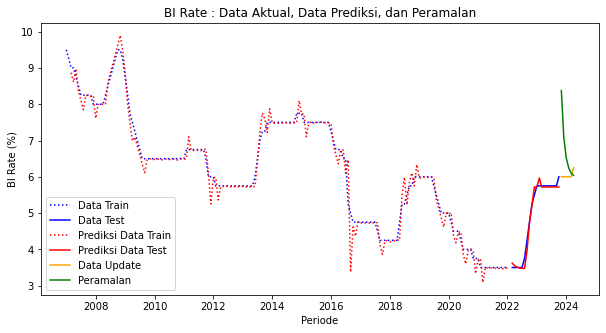

In [49]:
plt.figure(figsize=(10, 5))
#Plot data aktual 
plt.plot(train_data_asli['Kurs'], label='Data Train', color='blue', linestyle='dotted')
plt.plot(test_data_asli['Kurs'], label='Data Test', color='blue')

#Plot data prediksi
plt.plot(predict_undiff_df['Prediksi Kurs'], label='Prediksi Data Train', color='red', linestyle='dotted')
plt.plot(test_predict_undiff_df['Prediksi Kurs'], label='Prediksi Data Test', color='red')

plt.plot(data_update['Kurs'], color='orange', label= 'Data Update')
plt.plot(df_peramalan.index, df_peramalan['Kurs'], color='green', label='Peramalan')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('Kurs')

#Menambahkan Judul
plt.title('Kurs : Data Aktual, Data Prediksi, dan Peramalan')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

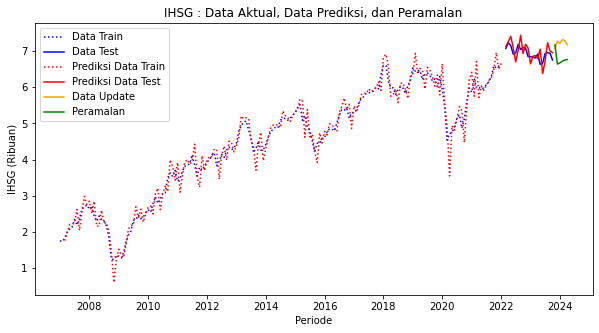

In [50]:
plt.figure(figsize=(10, 5))
#Plot data aktual 
plt.plot(train_data_asli['ICBP'], label='Data Train', color='blue', linestyle='dotted')
plt.plot(test_data_asli['ICBP'], label='Data Test', color='blue')

#Plot data prediksi
plt.plot(predict_undiff_df['Prediksi ICBP'], label='Prediksi Data Train', color='red', linestyle='dotted')
plt.plot(test_predict_undiff_df['Prediksi ICBP'], label='Prediksi Data Test', color='red')

plt.plot(data_update['ICBP'], color='orange', label= 'Data Update')
plt.plot(df_peramalan.index, df_peramalan['ICBP'], color='green', label='Peramalan')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('ICBP')

#Menambahkan Judul
plt.title('ICBP : Data Aktual, Data Prediksi, dan Peramalan')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

# Menghitung Residual VAR

In [51]:
residual = model_fit.resid
residual.columns = ["Residual Kurs", "Residual ICBP"]
residual

,Residual BI Rate,Residual IHSG
Periode,,
2007-03-01,-0.117026,0.051080
2007-04-01,0.140718,0.115692
2007-05-01,-0.223682,0.042276
2007-06-01,-0.109632,0.003021
2007-07-01,-0.111833,0.161340
...,...,...
2021-09-01,0.019905,0.105103
2021-10-01,0.024014,0.265609
2021-11-01,0.036242,-0.117837


In [52]:
#Membuat dataframe residuals
residuals = pd.DataFrame(residual)

residuals

,Residual BI Rate,Residual IHSG
Periode,,
2007-03-01,-0.117026,0.051080
2007-04-01,0.140718,0.115692
2007-05-01,-0.223682,0.042276
2007-06-01,-0.109632,0.003021
2007-07-01,-0.111833,0.161340
...,...,...
2021-09-01,0.019905,0.105103
2021-10-01,0.024014,0.265609
2021-11-01,0.036242,-0.117837


In [53]:
residuals_test_icbp = test_data_asli['ICBP'] - test_predict_undiff_df['Prediksi ICBP']

residuals_test_icbp

Periode
2022-03-01   -0.050993
2022-04-01   -0.034594
2022-05-01   -0.256170
2022-06-01   -0.180511
2022-07-01    0.251808
2022-08-01    0.161794
2022-09-01   -0.391898
2022-10-01    0.168993
2022-11-01   -0.102681
2022-12-01   -0.240182
2023-01-01    0.192308
2023-02-01   -0.011937
2023-03-01   -0.068985
2023-04-01    0.121271
2023-05-01   -0.420030
2023-06-01    0.283949
2023-07-01    0.213728
2023-08-01   -0.274712
2023-09-01   -0.062402
2023-10-01   -0.201442
dtype: float64

In [54]:
residuals_test_kurs = test_data_asli['Kurs'] - test_predict_undiff_df['Prediksi Kurs']

residuals_test_kurs

Periode
2022-03-01   -0.119731
2022-04-01   -0.045126
2022-05-01   -0.006984
2022-06-01    0.012067
2022-07-01    0.021533
2022-08-01    0.276231
2022-09-01    0.278562
2022-10-01    0.029718
2022-11-01    0.030292
2022-12-01   -0.219423
2023-01-01    0.030718
2023-02-01   -0.219212
2023-03-01    0.030823
2023-04-01    0.030840
2023-05-01    0.030848
2023-06-01    0.030853
2023-07-01    0.030855
2023-08-01    0.030856
2023-09-01    0.030856
2023-10-01    0.280857
dtype: float64

In [55]:
residuals_combined_df = pd.DataFrame({
    'Residuals ICBP': residuals_test_icbp,
    'Residuals Kurs': residuals_test_kurs
})

print(residuals_combined_df)

            Residuals IHSG  Residuals BI Rate
Periode                                      
2022-03-01       -0.050993          -0.119731
2022-04-01       -0.034594          -0.045126
2022-05-01       -0.256170          -0.006984
2022-06-01       -0.180511           0.012067
2022-07-01        0.251808           0.021533
2022-08-01        0.161794           0.276231
2022-09-01       -0.391898           0.278562
2022-10-01        0.168993           0.029718
2022-11-01       -0.102681           0.030292
2022-12-01       -0.240182          -0.219423
2023-01-01        0.192308           0.030718
2023-02-01       -0.011937          -0.219212
2023-03-01       -0.068985           0.030823
2023-04-01        0.121271           0.030840
2023-05-01       -0.420030           0.030848
2023-06-01        0.283949           0.030853
2023-07-01        0.213728           0.030855
2023-08-01       -0.274712           0.030856
2023-09-01       -0.062402           0.030856
2023-10-01       -0.201442        

In [56]:
#Membuat dataframe residuals
residuals_test = pd.DataFrame(residuals_combined_df)

residuals_test

,Residuals IHSG,Residuals BI Rate
Periode,,
2022-03-01,-0.050993,-0.119731
2022-04-01,-0.034594,-0.045126
2022-05-01,-0.256170,-0.006984
2022-06-01,-0.180511,0.012067
2022-07-01,0.251808,0.021533
2022-08-01,0.161794,0.276231
2022-09-01,-0.391898,0.278562
2022-10-01,0.168993,0.029718
2022-11-01,-0.102681,0.030292


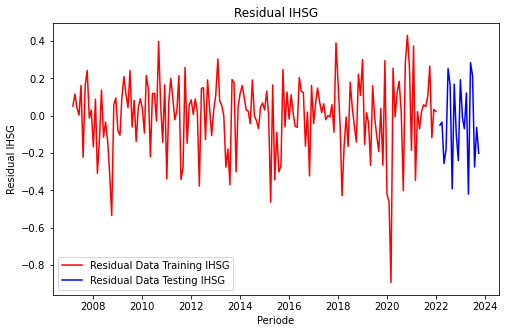

In [57]:
plt.figure(figsize=(8, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(residuals['Residual ICBP'], label='Residual Data Training ICBP', color='red')

plt.plot(residuals_test['Residuals ICBP'], label='Residual Data Testing ICBP', color='blue')

# Menambahkan judul dan label sumbu
plt.title('Residual ICBP')
plt.xlabel('Periode')
plt.ylabel('Residual ICBP')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

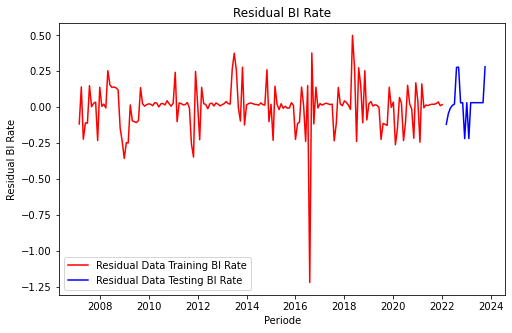

In [58]:
plt.figure(figsize=(8, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(residuals['Residual Kurs'], label='Residual Data Training Kurs', color='red')

plt.plot(residuals_test['Residuals Kurs'], label='Residual Data Testing Kurs', color='blue')

# Menambahkan judul dan label sumbu
plt.title('Residual Kurs')
plt.xlabel('Periode')
plt.ylabel('Residual Kurs')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [59]:
df_residual = pd.DataFrame(residuals)

#Menyimpan DataFrame sebagai file Excel
nama_file_excel = 'dataresidual_sama.xlsx'  # Nama file Excel yang ingin Anda berikan
df_residual.to_excel(nama_file_excel, index=False)  # index=False untuk menghapus kolom indeks saat menyimpan

print(f'DataFrame telah disimpan sebagai file Excel dengan nama: {nama_file_excel}')

DataFrame telah disimpan sebagai file Excel dengan nama: dataresidual_sama.xlsx


In [60]:
test_data19 = test_data.iloc[1:]
test_data19

,BI Rate,IHSG
Periode,,
2022-03-01,0.00,0.18327
2022-04-01,0.00,0.15747
2022-05-01,0.00,-0.07994
2022-06-01,0.00,-0.23739
2022-07-01,0.00,0.03954
2022-08-01,0.25,0.22747
2022-09-01,0.50,-0.13779
2022-10-01,0.50,0.05809
2022-11-01,0.50,-0.01758


In [61]:
prediksi_test2 = prediksi_test2.iloc[1:]
prediksi_test2

,Prediksi BI Rate,Prediksi IHSG
Periode,,
2022-03-01,0.119731,0.234263
2022-04-01,0.045126,0.192064
2022-05-01,0.006984,0.176230
2022-06-01,-0.012067,-0.056879
2022-07-01,-0.021533,-0.212268
2022-08-01,-0.026231,0.065676
2022-09-01,0.221438,0.254108
2022-10-01,0.470282,-0.110903
2022-11-01,0.469708,0.085101


In [62]:
#Residual Data test
#Menghitung residual untuk variabel SBI
residual_Kurs = test_data19['Kurs'] - prediksi_test2['Prediksi Kurs']

#Menghitung residual untuk variabel IHSG
residual_ICBP = test_data19['ICBP'] - prediksi_test2['Prediksi ICBP']

#Membuat dataframe residuals
residuals_test = pd.DataFrame({'Residual Kurs': residual_Kurs,
                             'Residual ICBP': residual_ICBP})

residuals_test

,Residual BI Rate,Residual IHSG
Periode,,
2022-03-01,-0.119731,-0.050993
2022-04-01,-0.045126,-0.034594
2022-05-01,-0.006984,-0.256170
2022-06-01,0.012067,-0.180511
2022-07-01,0.021533,0.251808
2022-08-01,0.276231,0.161794
2022-09-01,0.278562,-0.391898
2022-10-01,0.029718,0.168993
2022-11-01,0.030292,-0.102681


In [63]:
df_residual_test = pd.DataFrame(residuals_test)

#Menyimpan DataFrame sebagai file Excel
nama_file_excel = 'dataresidualtest_sama.xlsx'  # Nama file Excel yang ingin Anda berikan
df_residual_test.to_excel(nama_file_excel, index=False)  # index=False untuk menghapus kolom indeks saat menyimpan

print(f'DataFrame telah disimpan sebagai file Excel dengan nama: {nama_file_excel}')

DataFrame telah disimpan sebagai file Excel dengan nama: dataresidualtest_sama.xlsx


# Uji Asumsi Residual

In [64]:
#Uji asumsi residual white noise
#Assuming residuals is a DataFrame and you want to test the 'column_name'
results = acorr_ljungbox(residuals['Residual ICBP'], lags=[3], return_df=True)
results

,lb_stat,lb_pvalue
1,0.002636,0.959053


In [65]:
#Uji asumsi residual white noise
#Assuming residuals is a DataFrame and you want to test the 'column_name'
results = acorr_ljungbox(residuals['Residual Kurs'], lags=[3], return_df=True)
results

,lb_stat,lb_pvalue
1,1.220771,0.269209


In [66]:
#Uji asumsi residual white noise
#Assuming residuals is a DataFrame and you want to test the 'column_name'
results_test = acorr_ljungbox(residuals_test['Residual ICBP'], lags=[3], return_df=True)
results_test

,lb_stat,lb_pvalue
1,2.619005,0.105591


In [67]:
#Uji asumsi residual white noise
#Assuming residuals is a DataFrame and you want to test the 'column_name'
results_test = acorr_ljungbox(residuals_test['Residual Kurs'], lags=[3], return_df=True)
results_test

,lb_stat,lb_pvalue
1,1.078087,0.299126


# Akurasi VAR

In [69]:
predict_undiff_df.shape

(179, 2)

In [68]:
#Menghapus baris pertama yang tidak memiliki nilai yang valid setelah differencing
train_data_asli = train_data_asli.iloc[2:]


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
#Evaluate the model
mse = mean_squared_error(train_data_asli, predict_undiff_df)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(train_data_asli, predict_undiff_df)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(train_data_asli, predict_undiff_df)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 0.07005793073834568
Mean Absolute Percentage Error: 0.039737083674048504
Mean Absolute Error: 0.1774087232405616
Accuracy: 99.96026291632595


# Import library untuk GRU

In [71]:
pip install tensorflow==2.12.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Input Data Prediksi

In [73]:
import pandas as pd

# Load the data
data = pd.read_excel('dataprediksi_sama.xlsx')

# Buat rentang tanggal berdasarkan jumlah baris dalam data
data_index = pd.date_range(start='2007-03-01', periods=len(data), freq='M')

# Atur indeks DataFrame
data.index = data_index

# Tampilkan DataFrame
print(data)


            Prediksi BI Rate  Prediksi IHSG
2007-03-31          8.867026       1.763550
2007-04-30          8.609282       1.973428
2007-05-31          8.973682       2.210294
2007-06-30          8.359632       2.221409
2007-07-31          8.111833       2.242290
...                      ...            ...
2021-09-30          3.480095       6.262097
2021-10-31          3.475986       6.462381
2021-11-30          3.463758       6.956177
2021-12-31          3.490130       6.490308
2022-01-31          3.482479       6.656352

[179 rows x 2 columns]


In [74]:
data_test = pd.read_excel('dataprediksitest_sama.xlsx')
data_test_index = pd.date_range(start='2022-02-01', periods=len(data_test), freq='M')

# Atur indeks DataFrame
data_test.index = data_test_index

# Tampilkan DataFrame
print(data_test)


            Prediksi BI Rate  Prediksi IHSG
2022-02-28          3.619731       7.122433
2022-03-31          3.545126       7.263504
2022-04-30          3.506984       7.405140
2022-05-31          3.487933       7.092091
2022-06-30          3.478467       6.699312
2022-07-31          3.473769       7.016796
2022-08-31          3.971438       7.432698
2022-09-30          4.720282       6.929897
2022-10-31          5.219708       7.183991
2022-11-30          5.719423       7.090802
2022-12-31          5.719282       6.647032
2023-01-31          5.969212       6.855177
2023-02-28          5.719177       6.874265
2023-03-31          5.719160       6.794449
2023-04-30          5.719152       7.053290
2023-05-31          5.719147       6.377931
2023-06-30          5.719145       6.717632
2023-07-31          5.719144       7.227972
2023-08-31          5.719144       7.002292
2023-09-30          5.719143       6.953652


## Scaling Data

In [75]:
#Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(data)
test_data = scaler.fit_transform(data_test)

## Membangun Model

In [76]:
def sequence_generator(data, time_steps):
    sequences, labels = [], []
    for i in range(time_steps, len(data)):
        seq = data[i - time_steps:i, 0:data.shape[1]]
        label = data[i, 0:data.shape[1]]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

def create_model(time_steps, GRU_units, Dense_units):
    model = Sequential()
    model.add(GRU(units=GRU_units, input_shape=(time_steps, 2), activation='tanh'))
    model.add(Dense(units=Dense_units, activation='tanh'))
    model.add(Dense(units=Dense_units, activation='tanh'))
    model.add(Dense(units=Dense_units, activation='tanh'))
    model.add(Dense(2, activation='tanh'))
    
    # Use Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [77]:
#Specify hyperparameters to search
param_grid = {
    'GRU_units': [32, 64, 128],  # Number of units in GRU layer
    'Dense_units': [32, 64, 128],
    'batch_size': [32, 64],
    'time_steps' : [3, 4, 5, 6],
    }


## Hyperparameter Tunning

In [78]:
%%time
# Model KerasRegressor
from keras.wrappers.scikit_learn import KerasRegressor
gru_model = KerasRegressor(build_fn=create_model, verbose=0)
time_steps = 6
X_train, y_train = sequence_generator(train_data, time_steps)

# Grid Search untuk hyperparameter tuning
grid_search = GridSearchCV(estimator=gru_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose = 1)
grid_search.fit(X_train, y_train, epochs=100)

#Get the best hyperparameters
best_params = grid_search.best_params_

#Now you can use best_params to create sequences for the test data
X_test, y_test = sequence_generator(test_data, time_steps)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: total: 4min 42s
Wall time: 6min 45s


In [79]:
print("\n Parameter Terbaik  {}".format(grid_search.best_params_))


 Parameter Terbaik  {'Dense_units': 64, 'GRU_units': 64, 'batch_size': 32, 'time_steps': 6}


## Parameter Terbaik

In [80]:
#Train the final model with the best hyperparameters and include validation data
model = create_model(best_params['time_steps'], best_params['GRU_units'], best_params['Dense_units'])
history = model.fit(X_train, y_train, epochs=100, batch_size=best_params['batch_size'], validation_data=(X_train, y_train), validation_split=0.2, verbose=1)

Epoch 1/100
6/6 [==============================] - 4s 150ms/step - loss: 0.1524 - val_loss: 0.1862
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.1236 - val_loss: 0.0340
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0396 - val_loss: 0.0430
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0277 - val_loss: 0.0182
Epoch 5/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0130 - val_loss: 0.0168
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0108 - val_loss: 0.0095
Epoch 7/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0089 - val_loss: 0.0065
Epoch 8/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0062 - val_loss: 0.0066
Epoch 9/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0061 - val_loss: 0.0064
Epoch 10/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 11/100
6/6 [

In [81]:
#Make predictions on the test set
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 520ms/step


In [82]:
y_test

array([[0.19943116, 1.        ],
       [0.49951558, 0.52330599],
       [0.69965089, 0.76420624],
       [0.89990205, 0.67585618],
       [0.89984546, 0.25512843],
       [1.        , 0.452466  ],
       [0.89980346, 0.47056241],
       [0.89979655, 0.39489042],
       [0.89979312, 0.64029242],
       [0.89979142, 0.        ],
       [0.89979057, 0.32206219],
       [0.89979015, 0.80590402],
       [0.89978995, 0.59194211],
       [0.89978984, 0.5458277 ]])

In [83]:
y_pred

array([[-0.03150367,  0.6357054 ],
       [ 0.07470807,  0.84042543],
       [ 0.40703663,  0.743218  ],
       [ 0.6092672 ,  0.750503  ],
       [ 0.77011305,  0.6858648 ],
       [ 0.8471186 ,  0.42145744],
       [ 0.86551803,  0.4116858 ],
       [ 0.829767  ,  0.44586736],
       [ 0.8258524 ,  0.41374812],
       [ 0.7954062 ,  0.53165317],
       [ 0.8522186 ,  0.16073252],
       [ 0.8307966 ,  0.27528647],
       [ 0.7595771 ,  0.57871914],
       [ 0.785209  ,  0.55651087]], dtype=float32)

In [84]:
#Menggunakan MinMaxScaler yang sama yang digunakan sebelumnya untuk denormalisasi hasil peramalan
denormalize_y_pred = scaler.inverse_transform(y_pred)

#Membuat DataFrame dari hasil peramalan yang sudah denormalisasi
denormalize_y_pred_df = pd.DataFrame(denormalize_y_pred, columns=['BI Rate', 'IHSG'])

#Menampilkan hasil peramalan yang sudah denormalisasi dalam bentuk DataFrame
denormalize_y_pred_df

,BI Rate,IHSG
0,3.395154,7.048452
1,3.660199,7.264384
2,4.489506,7.161853
3,4.994161,7.169537
4,5.395543,7.101359
5,5.587705,6.822471
6,5.633620,6.812164
7,5.544405,6.848217
8,5.534636,6.814339
9,5.458660,6.938701


In [85]:
#Menggunakan MinMaxScaler yang sama yang digunakan sebelumnya untuk denormalisasi hasil peramalan
denormalize_y_test = scaler.inverse_transform(y_test)

#Membuat DataFrame dari hasil peramalan yang sudah denormalisasi
denormalize_y_test_df = pd.DataFrame(denormalize_y_test, columns=['BI Rate', 'IHSG'])

#Menampilkan hasil peramalan yang sudah denormalisasi dalam bentuk DataFrame
denormalize_y_test_df

,BI Rate,IHSG
0,3.971438,7.432698
1,4.720282,6.929897
2,5.219708,7.183991
3,5.719423,7.090802
4,5.719282,6.647032
5,5.969212,6.855177
6,5.719177,6.874265
7,5.719160,6.794449
8,5.719152,7.053290
9,5.719147,6.377931


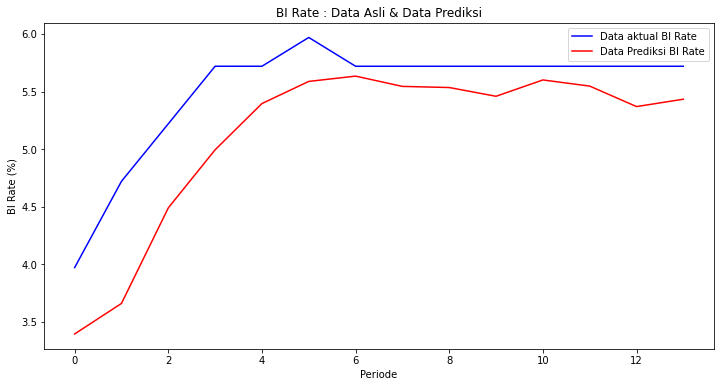

In [86]:
#Visualisasi Data Prediksi BI Rate
plt.figure(figsize=(12, 6))
plt.plot(denormalize_y_test_df['BI Rate'], label='Data aktual BI Rate', color='blue')
plt.plot(denormalize_y_pred_df['BI Rate'], label='Data Prediksi BI Rate', color='red')
plt.title('BI Rate : Data Asli & Data Prediksi')
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')
plt.legend()
plt.show()

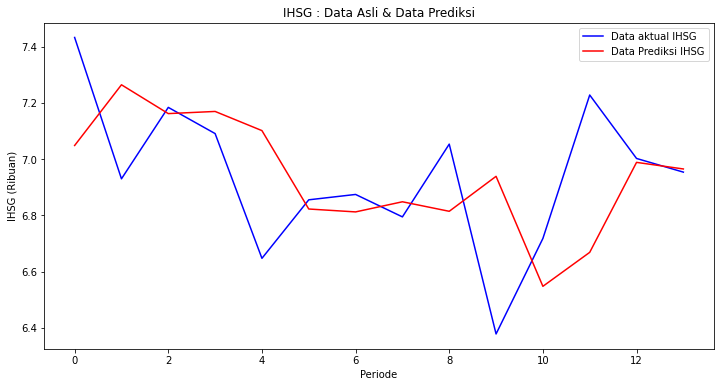

In [87]:
#Visualisasi Data Prediksi IHSG
plt.figure(figsize=(12, 6))
plt.plot(denormalize_y_test_df['IHSG'], label='Data aktual IHSG', color='blue')
plt.plot(denormalize_y_pred_df['IHSG'], label='Data Prediksi IHSG', color='red')
plt.title('IHSG : Data Asli & Data Prediksi')
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')
plt.legend()
plt.show()

In [88]:
#Evaluate the model
mse = mean_squared_error(denormalize_y_test_df, denormalize_y_pred_df)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(denormalize_y_test_df, denormalize_y_pred_df)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(denormalize_y_test_df, denormalize_y_pred_df)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 0.15527265614464492
Mean Absolute Percentage Error: 0.052666474679571425
Mean Absolute Error: 0.3002281253925332
Accuracy: 99.94733352532043


In [89]:
#Access the loss and validation loss from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

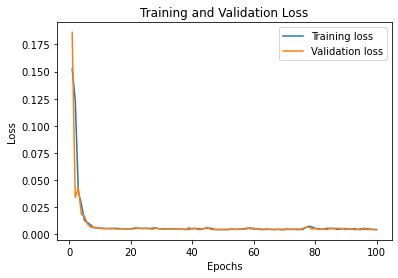

In [90]:
# Create a range of epochs for the x-axis
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Peramalan

In [91]:
prediction_scale = pd.DataFrame(scaler.fit_transform(denormalize_y_test_df), columns = ['BI Rate', 'IHSG'])
prediction_scale

time_steps = 6
input_prediction = prediction_scale.tail(time_steps)
input_prediction

x_input_prediction = np.array(input_prediction).reshape(1,-1)
x_input_prediction = x_input_prediction.reshape((time_steps, 1, 2))
x_input_prediction

monthly_input_prediction = list(x_input_prediction)
monthly_input_prediction = monthly_input_prediction[0].tolist()
monthly_input_prediction

yhat_prediction = model.predict(x_input_prediction)
yhat_prediction

# Peramalan
from numpy import array

output_peramalan_prediction = []
time_steps = 6
i = 0

#print(daily_input)
print("{} monthly input {}".format(i, monthly_input_prediction))

#print(x_input)
print("{} monthly output {}".format(i, yhat_prediction))
monthly_input_prediction.extend(yhat_prediction.tolist())
monthly_input_prediction = monthly_input_prediction[1:]

#print(daily_input)
output_peramalan_prediction.extend(yhat_prediction.tolist())
i = i+1

print(output_peramalan_prediction)

output_forecast_prediction = scaler.inverse_transform(output_peramalan_prediction)
output_forecast_prediction = np.array(output_forecast_prediction)
output_forecast_prediction = pd.DataFrame(output_forecast_prediction, columns = ['BI Rate', 'IHSG'])
output_forecast_prediction

1/1 [==============================] - 1s 535ms/step
0 monthly input [[0.8748303991604434, 0.640292421799523]]
0 monthly output [[0.6982641  0.6805655 ]
 [0.7807081  0.25083283]
 [0.74353313 0.4947313 ]
 [0.6719436  0.7525407 ]
 [0.7056285  0.6564113 ]
 [0.712503   0.63200575]]
[[0.6982641220092773, 0.6805654764175415], [0.7807080745697021, 0.25083282589912415], [0.7435331344604492, 0.4947313070297241], [0.6719436049461365, 0.7525407075881958], [0.705628514289856, 0.6564112901687622], [0.7125030159950256, 0.6320057511329651]]


,BI Rate,IHSG
0,5.366412,7.095769
1,5.531116,6.642501
2,5.456849,6.899757
3,5.313830,7.171686
4,5.381124,7.070292
5,5.394858,7.044550


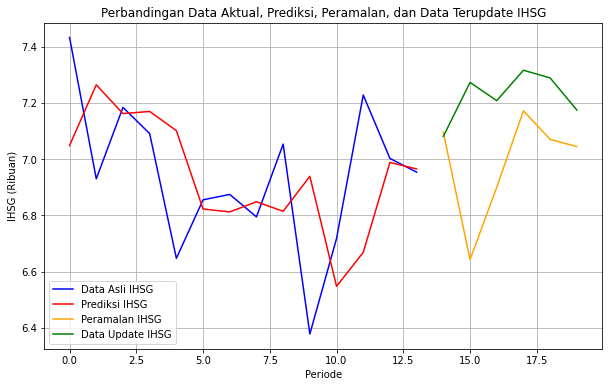

In [92]:
#Plot
plt.figure(figsize=(10, 6)) 
plt.plot(denormalize_y_test_df['IHSG'], label="Data Asli IHSG", color="blue")
plt.plot(denormalize_y_pred_df['IHSG'], label="Prediksi IHSG", color="red")

#Mengatur ulang indeks data update dan forecast1_df
forecast1_df_reindexed = output_forecast_prediction.reset_index(drop=True)
data_update_reindexed = data_update.reset_index(drop=True)


#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(forecast1_df_reindexed)), forecast1_df_reindexed['IHSG'], color='orange', label='Peramalan IHSG')
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(data_update_reindexed)), data_update_reindexed['IHSG'], color='green', label='Data Update IHSG')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan, dan Data Terupdate IHSG')
plt.legend()

#Menampilkan plot
plt.grid(True)
plt.show()


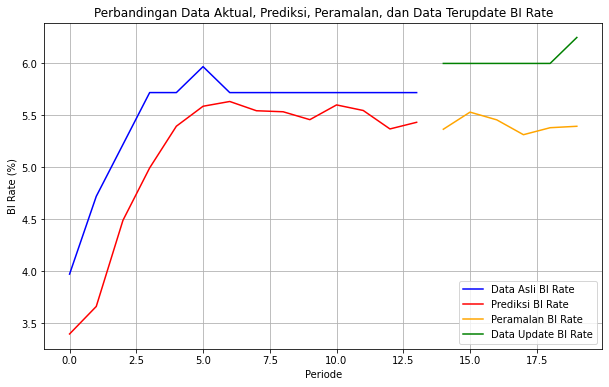

In [93]:
#Plot
plt.figure(figsize=(10, 6)) 
plt.plot(denormalize_y_test_df['BI Rate'], label="Data Asli BI Rate", color="blue")
plt.plot(denormalize_y_pred_df['BI Rate'], label="Prediksi BI Rate", color="red")

#Mengatur ulang indeks data update dan forecast1_df
forecast1_df_reindexed = output_forecast_prediction.reset_index(drop=True)
data_update_reindexed = data_update.reset_index(drop=True)


#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(forecast1_df_reindexed)), forecast1_df_reindexed['BI Rate'], color='orange', label='Peramalan BI Rate')
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(data_update_reindexed)), data_update_reindexed['BI Rate'], color='green', label='Data Update BI Rate')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan, dan Data Terupdate BI Rate')
plt.legend()

#Menampilkan plot
plt.grid(True)
plt.show()


## Data Residual

In [94]:
# Load the data
data_res = pd.read_excel('dataresidual_sama.xlsx')
# Buat rentang tanggal berdasarkan jumlah baris dalam data
datares_index = pd.date_range(start='2007-03-01', periods=len(data_res), freq='M')

# Atur indeks DataFrame
data_res.index = datares_index
data_res

,Residual BI Rate,Residual IHSG
2007-03-31,-0.117026,0.051080
2007-04-30,0.140718,0.115692
2007-05-31,-0.223682,0.042276
2007-06-30,-0.109632,0.003021
2007-07-31,-0.111833,0.161340
...,...,...
2021-09-30,0.019905,0.105103
2021-10-31,0.024014,0.265609
2021-11-30,0.036242,-0.117837
2021-12-31,0.009870,0.033752


In [95]:
data_test_res = pd.read_excel('dataresidualtest_sama.xlsx')
# Buat rentang tanggal berdasarkan jumlah baris dalam data
datarestest_index = pd.date_range(start='2022-02-01', periods=len(data_test_res), freq='M')
# Atur indeks DataFrame
data_test_res.index = datarestest_index
data_test_res

,Residual BI Rate,Residual IHSG
2022-02-28,-0.119731,-0.050993
2022-03-31,-0.045126,-0.034594
2022-04-30,-0.006984,-0.256170
2022-05-31,0.012067,-0.180511
2022-06-30,0.021533,0.251808
2022-07-31,0.276231,0.161794
2022-08-31,0.278562,-0.391898
2022-09-30,0.029718,0.168993
2022-10-31,0.030292,-0.102681
2022-11-30,-0.219423,-0.240182


In [96]:
# Scale the data
scaler = MinMaxScaler()
train_data_res = scaler.fit_transform(data_res)
test_data_res = scaler.fit_transform(data_test_res)

In [97]:
def sequence_generator(data, time_steps):
    sequences, labels = [], []
    for i in range(time_steps, len(data)):
        seq = data[i - time_steps:i, 0:data.shape[1]]
        label = data[i, 0:data.shape[1]]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

def create_model(time_steps, GRU_units, Dense_units):
    model = Sequential()
    model.add(GRU(units=GRU_units, input_shape=(time_steps, 2), activation='tanh'))
    model.add(Dense(units=Dense_units, activation='tanh'))
    model.add(Dense(units=Dense_units, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='tanh'))

    
    # Use Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [98]:
#Specify hyperparameters to search
param_grid = {
    'GRU_units': [32, 64, 128],  # Number of units in GRU layer
    'Dense_units': [32, 64, 128],
    'batch_size': [32, 64],
    'time_steps' : [3, 4, 5, 6]
}


In [99]:
%%time
# Model KerasRegressor
from keras.wrappers.scikit_learn import KerasRegressor
gru_model = KerasRegressor(build_fn=create_model, verbose=0)
time_steps = 6
X_train_res, y_train_res = sequence_generator(train_data_res, time_steps)

# Grid Search untuk hyperparameter tuning
grid_search = GridSearchCV(estimator=gru_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose = 1)
grid_search.fit(X_train_res, y_train_res, epochs=100)

#Get the best hyperparameters
best_params = grid_search.best_params_

#Now you can use best_params to create sequences for the test data
X_test_res, y_test_res = sequence_generator(test_data_res, best_params['time_steps'])

Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: total: 6min 5s
Wall time: 9min 55s


In [100]:
print("\n Parameter Terbaik  {}".format(grid_search.best_params_))


 Parameter Terbaik  {'Dense_units': 64, 'GRU_units': 64, 'batch_size': 64, 'time_steps': 6}


In [101]:
#Train the final model with the best hyperparameters and include validation data
final_model_res = create_model(best_params['time_steps'], best_params['GRU_units'], best_params['Dense_units'])
history_res = final_model_res.fit(X_train_res, y_train_res, epochs=100, batch_size=best_params['batch_size'], validation_data=(X_train_res, y_train_res), validation_split=0.2, verbose=2)

Epoch 1/100
3/3 - 5s - loss: 0.7080 - val_loss: 0.0990 - 5s/epoch - 2s/step
Epoch 2/100
3/3 - 0s - loss: 0.5242 - val_loss: 0.0682 - 51ms/epoch - 17ms/step
Epoch 3/100
3/3 - 0s - loss: 0.1786 - val_loss: 0.0494 - 72ms/epoch - 24ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0660 - val_loss: 0.0371 - 62ms/epoch - 21ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0245 - val_loss: 0.0404 - 95ms/epoch - 32ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0210 - val_loss: 0.0377 - 58ms/epoch - 19ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0280 - val_loss: 0.0369 - 56ms/epoch - 19ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0331 - val_loss: 0.0390 - 57ms/epoch - 19ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0343 - val_loss: 0.0442 - 51ms/epoch - 17ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0320 - val_loss: 0.0539 - 54ms/epoch - 18ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0276 - val_loss: 0.0696 - 60ms/epoch - 20ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0222 - val_loss: 0.0913 - 57ms/epoch - 19ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0181 - va

In [102]:
# Make predictions on the test set
y_pred_res = final_model_res.predict(X_test_res)

1/1 [==============================] - 1s 539ms/step


In [103]:
# Menggunakan MinMaxScaler yang sama yang digunakan sebelumnya
# Untuk denormalisasi hasil peramalan
denormalize_y_pred_res = scaler.inverse_transform(y_pred_res)

# Membuat DataFrame dari hasil peramalan yang sudah denormalisasi
denormalize_y_pred_res_df = pd.DataFrame(denormalize_y_pred_res, columns=['BI Rate', 'IHSG'])

# Menampilkan hasil peramalan yang sudah denormalisasi dalam bentuk DataFrame
denormalize_y_pred_res_df

,BI Rate,IHSG
0,0.164895,0.055726
1,0.167824,0.057255
2,0.178294,0.039149
3,0.176616,0.032026
4,0.179612,0.026189
5,0.169673,0.044665
6,0.173931,0.044777
7,0.163948,0.063991
8,0.168368,0.058564
9,0.171716,0.042147


In [104]:
# Menggunakan MinMaxScaler yang sama yang digunakan sebelumnya
# Untuk denormalisasi hasil peramalan
denormalize_y_test_res = scaler.inverse_transform(y_test_res)

# Membuat DataFrame dari hasil peramalan yang sudah denormalisasi
denormalize_y_test_res_df = pd.DataFrame(denormalize_y_test_res, columns=['BI Rate', 'IHSG'])

# Menampilkan hasil peramalan yang sudah denormalisasi dalam bentuk DataFrame
denormalize_y_test_res_df

,BI Rate,IHSG
0,0.278562,-0.391898
1,0.029718,0.168993
2,0.030292,-0.102681
3,-0.219423,-0.240182
4,0.030718,0.192308
5,-0.219212,-0.011937
6,0.030823,-0.068985
7,0.030840,0.121271
8,0.030848,-0.420030
9,0.030853,0.283949


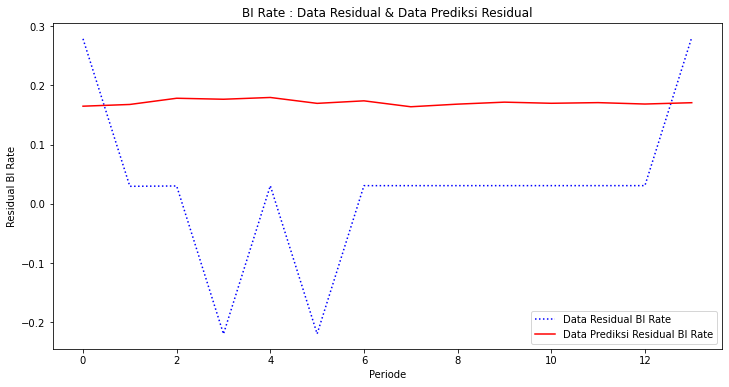

In [105]:
#Visualisasi Data Residual BI Rate
plt.figure(figsize=(12, 6))
plt.plot(denormalize_y_test_res_df['BI Rate'], label='Data Residual BI Rate', color='blue', linestyle='dotted')
plt.plot(denormalize_y_pred_res_df['BI Rate'], label='Data Prediksi Residual BI Rate', color='red')
plt.title('BI Rate : Data Residual & Data Prediksi Residual')
plt.xlabel('Periode')
plt.ylabel('Residual BI Rate')
plt.legend()
plt.show()

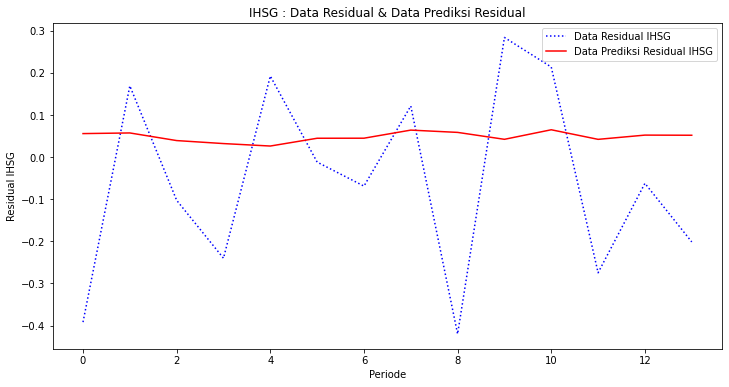

In [106]:
#Visualisasi Data Residual BI Rate
plt.figure(figsize=(12, 6))
plt.plot(denormalize_y_test_res_df['IHSG'], label='Data Residual IHSG', color='blue', linestyle='dotted')
plt.plot(denormalize_y_pred_res_df['IHSG'], label='Data Prediksi Residual IHSG', color='red')
plt.title('IHSG : Data Residual & Data Prediksi Residual')
plt.xlabel('Periode')
plt.ylabel('Residual IHSG')
plt.legend()
plt.show()

In [107]:
#Evaluate the model
mse = mean_squared_error(denormalize_y_test_res_df, denormalize_y_pred_res_df)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(denormalize_y_test_res_df, denormalize_y_pred_res_df)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(denormalize_y_test_res_df, denormalize_y_pred_res_df)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 0.04901694695356697
Mean Absolute Percentage Error: 2.4723090657479982
Mean Absolute Error: 0.19057087626579503
Accuracy: 97.527690934252


In [108]:
# Access the loss and validation loss from the training history
train_loss_res = history_res.history['loss']
val_loss_res = history_res.history['val_loss']

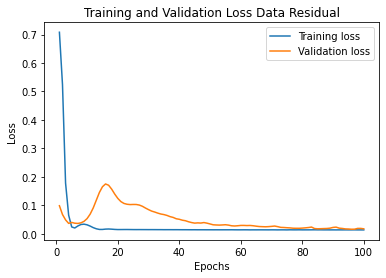

In [109]:
# Create a range of epochs for the x-axis
epochs = range(1, len(train_loss_res) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss_res, label='Training loss')
plt.plot(epochs, val_loss_res, label='Validation loss')
plt.title('Training and Validation Loss Data Residual')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [110]:
# Evaluate the model
mse = mean_squared_error(y_test_res, y_pred_res)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test_res, y_pred_res)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mae
print(f"Accuracy: {acc}")

Mean Squared Error: 0.13641976839317888
Mean Absolute Error: 0.3205903140005165
Accuracy: 99.67940968599949


In [111]:
y_pred_res.shape

(14, 2)

In [112]:
residual_scale = pd.DataFrame(scaler.fit_transform(denormalize_y_test_res_df), columns = ['BI Rate', 'IHSG'])
residual_scale

time_steps = 6
input_resid = residual_scale.tail(time_steps)
input_resid

x_input_resid = np.array(input_resid).reshape(1,-1)
x_input_resid = x_input_resid.reshape((time_steps, 1, 2))
x_input_resid

monthly_input_resid = list(x_input_resid)
monthly_input_resid = monthly_input_resid[0].tolist()
monthly_input_resid

yhat_resid = final_model_res.predict(x_input_resid)
yhat_resid

# Peramalan
from numpy import array

output_peramalan_residual = []
time_steps = 6
i = 1

#print(daily_input)
print("{} monthly input {}".format(i, monthly_input_resid))

#print(x_input)
print("{} monthly output {}".format(i, yhat_resid))
monthly_input_resid.extend(yhat_resid.tolist())
monthly_input_resid = monthly_input_resid[1:]

#print(daily_input)
output_peramalan_residual.extend(yhat_resid.tolist())
i = i+1

print(output_peramalan_prediction)

output_forecast_residual = scaler.inverse_transform(output_peramalan_residual)
output_forecast_residual = np.array(output_forecast_residual)
output_forecast_residual = pd.DataFrame(output_forecast_residual, columns = ['BI Rate', 'IHSG'])
output_forecast_residual

1/1 [==============================] - 1s 551ms/step
1 monthly input [[0.500263522796865, 0.0]]
1 monthly output [[0.75249153 0.93540263]
 [0.8389756  0.8901962 ]
 [0.8322637  0.8955658 ]
 [0.77437764 0.92758405]
 [0.8021991  0.91478604]
 [0.8420448  0.8959736 ]]
[[0.6982641220092773, 0.6805654764175415], [0.7807080745697021, 0.25083282589912415], [0.7435331344604492, 0.4947313070297241], [0.6719436049461365, 0.7525407075881958], [0.705628514289856, 0.6564112901687622], [0.7125030159950256, 0.6320057511329651]]


,BI Rate,IHSG
0,0.157033,0.238473
1,0.200299,0.206649
2,0.196942,0.210429
3,0.167982,0.232969
4,0.181901,0.223960
5,0.201835,0.210716


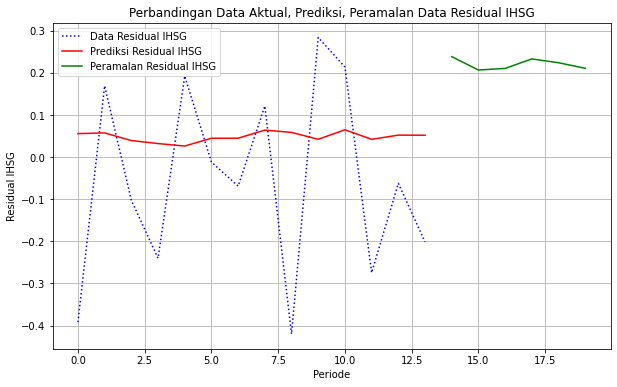

In [113]:
#Pplot
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
plt.plot(denormalize_y_test_res_df['IHSG'], label="Data Residual IHSG", color="blue", linestyle='dotted')
plt.plot(denormalize_y_pred_res_df['IHSG'], label="Prediksi Residual IHSG", color="red")

#Mengatur ulang indeks forecast_res_df
forecast_res_df_reindexed = output_forecast_residual.reset_index(drop=True)

#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_res_df), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed)), forecast_res_df_reindexed['IHSG'], color='green', label='Peramalan Residual IHSG')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('Residual IHSG')
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan Data Residual IHSG')
plt.legend()

#Menampilkan plot
plt.grid(True)
plt.show()


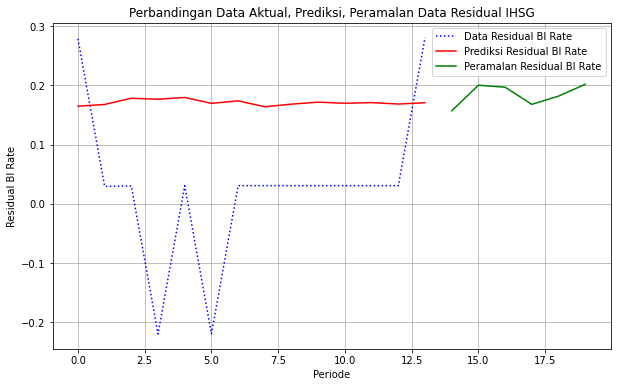

In [114]:
#Pplot
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
plt.plot(denormalize_y_test_res_df['BI Rate'], label="Data Residual BI Rate", color="blue", linestyle='dotted')
plt.plot(denormalize_y_pred_res_df['BI Rate'], label="Prediksi Residual BI Rate", color="red")

#Mengatur ulang indeks forecast_res_df
forecast_res_df_reindexed = output_forecast_residual.reset_index(drop=True)

#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_res_df), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed)), forecast_res_df_reindexed['BI Rate'], color='green', label='Peramalan Residual BI Rate')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('Residual BI Rate')
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan Data Residual IHSG')
plt.legend()

#Menampilkan plot
plt.grid(True)
plt.show()


In [115]:
hybrid = denormalize_y_pred_df + denormalize_y_pred_res_df
hybrid

,BI Rate,IHSG
0,3.560049,7.104178
1,3.828022,7.321640
2,4.667799,7.201001
3,5.170777,7.201563
4,5.575154,7.127548
5,5.757379,6.867136
6,5.807551,6.856941
7,5.708353,6.912208
8,5.703005,6.872903
9,5.630376,6.980848


In [116]:
#Input data
df = pd.read_excel("data_skripsi_sama.xlsx")

#Mengatur kolom tanggal sebagai indeks
df['Periode'] = pd.to_datetime(df['Periode'])
df.set_index('Periode', inplace=True)
#Split the data into training and testing sets (90% & 10%)
train_size = int(len(df) * 0.9)
train_data, test_data = df[:train_size], df[train_size:]

In [117]:
test_data
last_46_data = test_data[-14:].reset_index(drop=True)
last_46_data

,BI Rate,IHSG
0,4.25,7.04080
1,4.75,7.09889
2,5.25,7.08131
3,5.50,6.85062
4,5.75,6.83934
5,5.75,6.84324
6,5.75,6.80528
7,5.75,6.91572
8,5.75,6.63326
9,5.75,6.66188


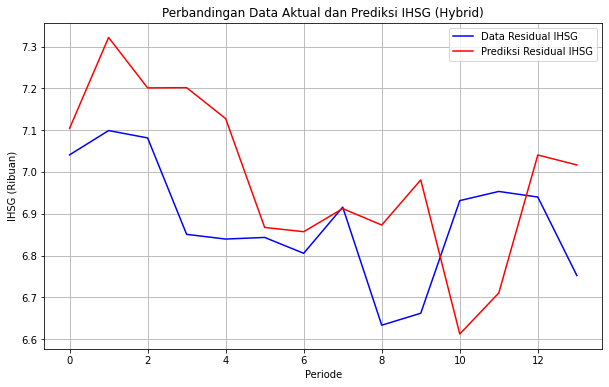

In [118]:
#Pplot
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
plt.plot(last_46_data['IHSG'], label="Data Residual IHSG", color="blue")
plt.plot(hybrid['IHSG'], label="Prediksi Residual IHSG", color="red")

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')
plt.title('Perbandingan Data Aktual dan Prediksi IHSG (Hybrid)')
plt.legend()

#Menampilkan plot
plt.grid(True)
plt.show()


In [119]:
final_predict_IHSG = denormalize_y_pred_df['IHSG'] + denormalize_y_pred_res_df['IHSG']
final_predict_BIRate = denormalize_y_pred_df['BI Rate'] + denormalize_y_pred_res_df['BI Rate']
final_predict = pd.DataFrame({'Prediksi BI Rate':final_predict_BIRate, 'Prediksi IHSG':final_predict_IHSG})
final_predict

,Prediksi BI Rate,Prediksi IHSG
0,3.560049,7.104178
1,3.828022,7.321640
2,4.667799,7.201001
3,5.170777,7.201563
4,5.575154,7.127548
5,5.757379,6.867136
6,5.807551,6.856941
7,5.708353,6.912208
8,5.703005,6.872903
9,5.630376,6.980848


In [120]:
final_IHSG = denormalize_y_test_df['IHSG'] + denormalize_y_test_res_df['IHSG']
final_BIRate = denormalize_y_test_df['BI Rate'] + denormalize_y_test_res_df['BI Rate']
final_df = pd.DataFrame({'BI Rate':final_BIRate, 'IHSG':final_IHSG})
final_df

,BI Rate,IHSG
0,4.25,7.04080
1,4.75,7.09889
2,5.25,7.08131
3,5.50,6.85062
4,5.75,6.83934
5,5.75,6.84324
6,5.75,6.80528
7,5.75,6.91572
8,5.75,6.63326
9,5.75,6.66188


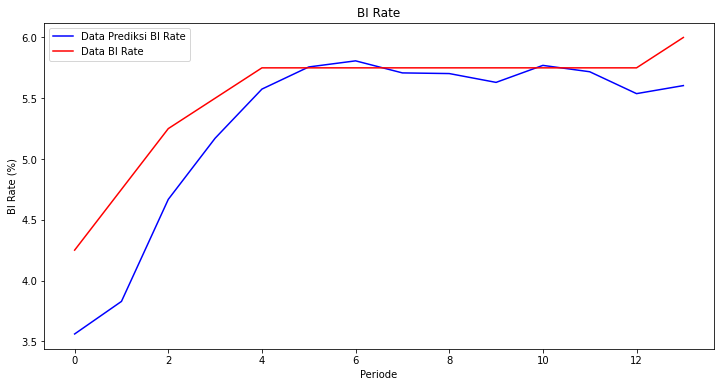

In [121]:
#Visualisasi Data BI Rate
plt.figure(figsize=(12, 6))
plt.plot(final_predict['Prediksi BI Rate'], label='Data Prediksi BI Rate', color='blue')
plt.plot(final_df['BI Rate'], label='Data BI Rate', color='red')
plt.title('BI Rate')
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')
plt.legend()
plt.show()

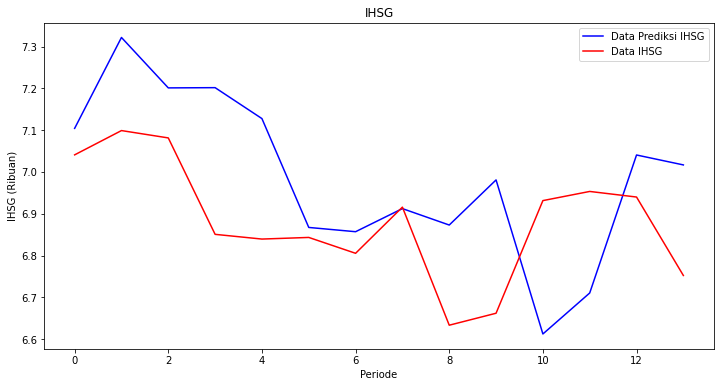

In [122]:
#Visualisasi Data BI Rate
plt.figure(figsize=(12, 6))
plt.plot(final_predict['Prediksi IHSG'], label='Data Prediksi IHSG', color='blue')
plt.plot(final_df['IHSG'], label='Data IHSG', color='red')
plt.title('IHSG')
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')
plt.legend()
plt.show()

In [123]:
final_forecast_IHSG = output_forecast_prediction['IHSG'] + output_forecast_residual['IHSG']
final_forecast_BIRate = output_forecast_prediction['BI Rate'] + output_forecast_residual['BI Rate']
final_forecast = pd.DataFrame({'BI Rate':final_forecast_BIRate, 'IHSG':final_forecast_IHSG})
final_forecast

,BI Rate,IHSG
0,5.523445,7.334243
1,5.731416,6.849151
2,5.653791,7.110187
3,5.481812,7.404656
4,5.563025,7.294252
5,5.596693,7.255266


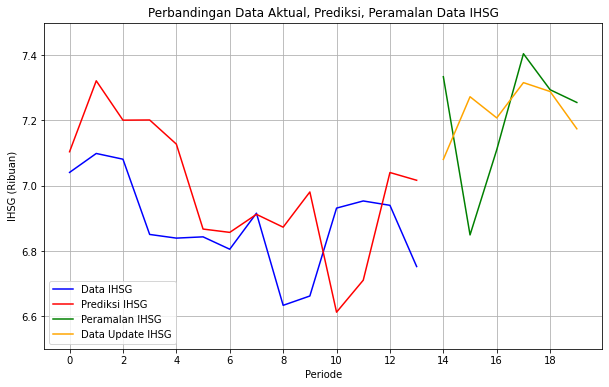

In [124]:
#VISUALISASI HYBRID
#Pplot
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
plt.plot(final_df['IHSG'], label="Data IHSG", color="blue")
plt.plot(final_predict['Prediksi IHSG'], label="Prediksi IHSG", color="red")

#Mengatur ulang indeks forecast_res_df
forecast_res_df_reindexed = final_forecast.reset_index(drop=True)
data_update_reindexed = data_update.reset_index(drop=True)

#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_res_df), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed)), forecast_res_df_reindexed['IHSG'], color='green', label='Peramalan IHSG')
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(data_update_reindexed)), data_update_reindexed['IHSG'], color='orange', label='Data Update IHSG')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')
plt.ylim(6.5,7.5)
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan Data IHSG')
plt.legend()
total_length = max(len(final_df), len(final_predict), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed), len(denormalize_y_test_df) + len(data_update_reindexed))
plt.xticks(np.arange(0, total_length, step=2))
#Menampilkan plot
plt.grid(True)
plt.show()

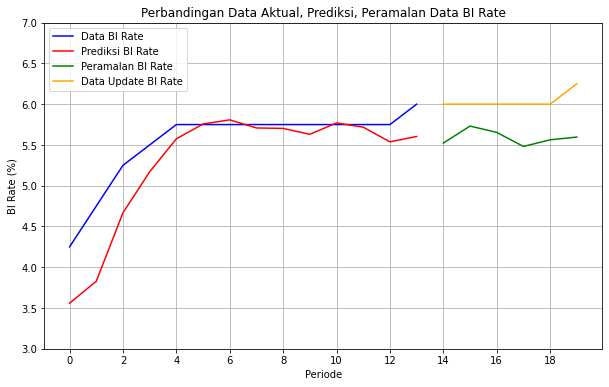

In [125]:
#VISUALISASI HYBRID
#Pplot
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
plt.plot(final_df['BI Rate'], label="Data BI Rate", color="blue")
plt.plot(final_predict['Prediksi BI Rate'], label="Prediksi BI Rate", color="red")

#Mengatur ulang indeks forecast_res_df
forecast_res_df_reindexed = final_forecast.reset_index(drop=True)
data_update_reindexed = data_update.reset_index(drop=True)

#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_res_df), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed)), forecast_res_df_reindexed['BI Rate'], color='green', label='Peramalan BI Rate')
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(data_update_reindexed)), data_update_reindexed['BI Rate'], color='orange', label='Data Update BI Rate')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan Data BI Rate')
plt.ylim(3,7)
plt.legend()
total_length = max(len(final_df), len(final_predict), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed), len(denormalize_y_test_df) + len(data_update_reindexed))
plt.xticks(np.arange(0, total_length, step=2))
#Menampilkan plot
plt.grid(True)
plt.show()

In [126]:
#Evaluasi Model Hybrid
mse = mean_squared_error(data_update, final_forecast)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(data_update, final_forecast)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(data_update, final_forecast)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 0.1310887719398771
Mean Absolute Percentage Error: 0.0481109792511441
Mean Absolute Error: 0.3041206084272219
Accuracy: 99.95188902074885


In [127]:
#Evaluasi Model Hybrid
mse = mean_squared_error(final_df, final_predict)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(final_df, final_predict)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(final_df, final_predict)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 0.09665747210049383
Mean Absolute Percentage Error: 0.03921467500270034
Mean Absolute Error: 0.22291734712873174
Accuracy: 99.9607853249973
